# "[Drafted] - Hong Kong Elevation map with rayshader (with R)
> Inspired by https://www.reddit.com/r/dataisbeautiful/comments/bjp8bg/the_united_states_of_elevation_oc/, I want to try picking up some R skill and play with the amazing `rayshader` library!. This blog is writtern in R yet powered by a python package `nbdev` to write blog with Jupyter notebook.


- toc: true 
- badges: true
- comments: true
- categories: [R, rayshader]
- hide: true

# Steps
1. Set up R environment with Anaconda https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/
2. Download Data
3. Data processing with Python (as I forgot how to write code in R already...)
4. Make the plot with rayshader with R!

Suprisingly, the data on ESRI, who work closely with HK gov is broken on https://opendata.esrichina.hk/datasets/6cbbb86e48744823973a07ac4c70c944?geometry=113.475%2C22.128%2C114.767%2C22.572 (or not?). I tried downloading a JPEG and my computer cannot open it. So I tried another one which works fine. https://data.gov.hk/en-data/dataset/hk-landsd-openmap-5m-grid-dtm

A digital terrain model, is basically a 3D map which records not only the lat, long but also the vertical elevation. 

In [1]:
#hide
#installing geopnadas on window is a hustle, so we install a wheel directly instead.
# I am using Python 3.7.9 on Window 10 when writing this blog
!pip install https://download.lfd.uci.edu/pythonlibs/z2tqcw5k/GDAL-3.1.4-cp37-cp37m-win_amd64.whl
!pip install https://download.lfd.uci.edu/pythonlibs/z2tqcw5k/Fiona-1.8.17-cp37-cp37m-win_amd64.whl
!pip install https://download.lfd.uci.edu/pythonlibs/z2tqcw5k/geopandas-0.8.1-py3-none-any.whl
!pip install https://download.lfd.uci.edu/pythonlibs/z2tqcw5k/Shapely-1.7.1-cp37-cp37m-win_amd64.whl

  Using cached https://download.lfd.uci.edu/pythonlibs/z2tqcw5k/Fiona-1.8.17-cp37-cp37m-win_amd64.whl (527 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)


ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/ba/06/e3440b1f2dc802d35f329f299ba96153e9fcbfdef75e17f4b61f79430c6a/cligj-0.7.0-py3-none-any.whl (Caused by ConnectTimeoutError(<pip._vendor.urllib3.connection.HTTPSConnection object at 0x00000292776B2308>, 'Connection to files.pythonhosted.org timed out. (connect timeout=15)'))



ERROR: Could not install packages due to an EnvironmentError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/88/62/69347ba2c41b526e1953c4cb66d51170b2869808863c03af202ba0121670/Fiona-1.8.17.tar.gz (Caused by ConnectTimeoutError(<pip._vendor.urllib3.connection.HTTPSConnection object at 0x000001E6570C56C8>, 'Connection to files.pythonhosted.org timed out. (connect timeout=15)'))



In [17]:
ls ..\data\rayshader

 Volume in drive C is Local Disk
 Volume Serial Number is AE95-2DD6

 Directory of C:\Users\lrcno\Documents\GitHub\mediumnok\data\rayshader

11/14/2020  06:35 PM    <DIR>          .
11/14/2020  06:35 PM    <DIR>          ..
11/14/2020  03:39 PM            62,536 hk_dtm_elevation_layer.tiff
11/14/2020  06:35 PM         6,750,239 hk_elevation_map.tif
               2 File(s)      6,812,775 bytes
               2 Dir(s)  15,071,039,488 bytes free


First, let's have a quick look on the file, it is a tiff file. We can read this with the image process library PIL.

In [ ]:
#collapse-hide
%matplotlib inline
!pip install pillow

In [24]:
tiff_file = '../data/rayshader/hk_elevation_map.tif'

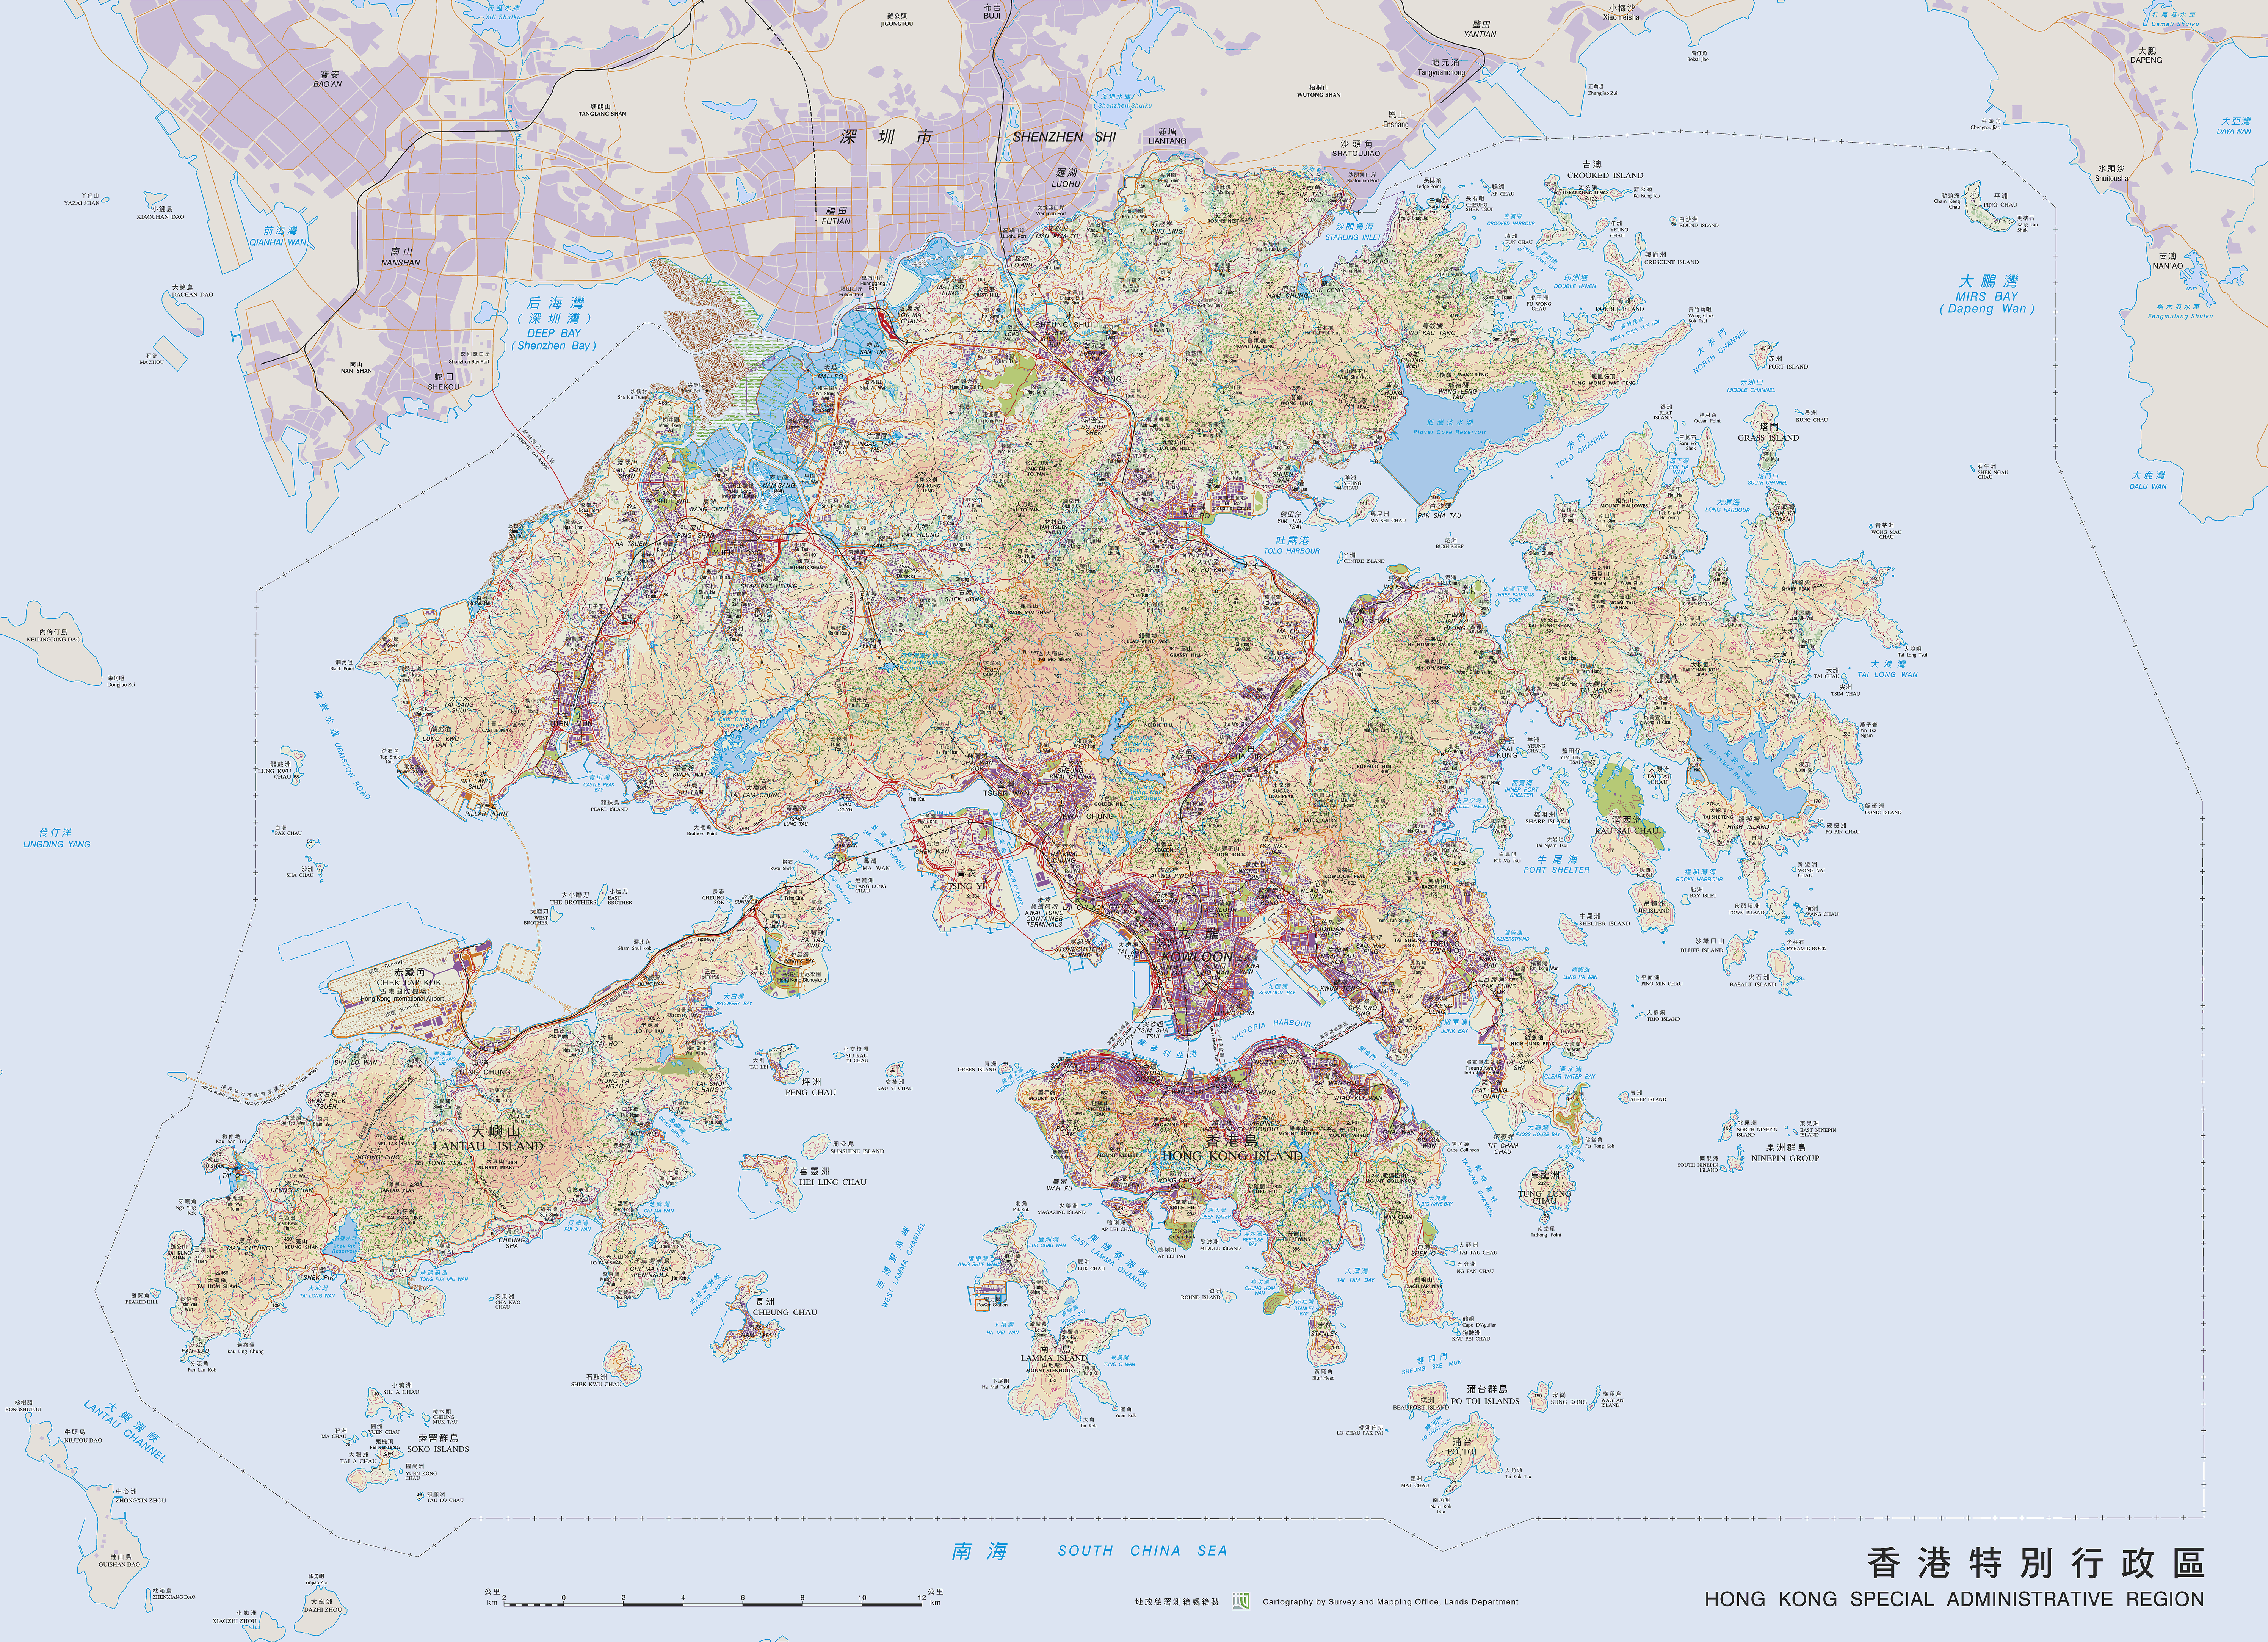

In [33]:
>>> from PIL import Image
>>> im = Image.open(tiff_file)
>>> im

We don't actually need everything on the map, we need the 3D coordinates only

In [30]:
import matplotlib.pyplot as plt
img = plt.imread(tiff_file)

In [34]:
img.shape

(4331, 5983, 4)

So it actually stores 4 dimension, I don't know what is it, I am guessing three dimension is for colors and 1 for elevation?

# Now let's switch to R
You can do this in Jupyter, Kernel > Change Kernel > R, and now you are in  R environment.

In [13]:
remove.packages("stringi")

Removing package from 'C:/Users/lrcno/Anaconda3/envs/blog/Lib/R/library'
(as 'lib' is unspecified)


ERROR: Error in find.package(pkgs, lib): there is no package called 'stringi'


In [2]:
install.packages("glue")

package 'glue' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lrcno\AppData\Local\Temp\Rtmp8MQE8K\downloaded_packages


In [ ]:
devtools::install_github("tylermorganwall/rayshader")

In [3]:
#collapse-hide

# You may need to install Rtools for building the package if you don't have it installed
# Downlaod from here https://cran.r-project.org/bin/windows/Rtools/history.html

install.packages("devtools")
devtools::install_github("tylermorganwall/rayshader")


also installing the dependency 'jsonlite'



package 'jsonlite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'jsonlite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\lrcno\Anaconda3\envs\blog\Lib\R\library\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\lrcno\Anaconda3\envs\blog\Lib\R\library\jsonlite\libs\x64\jsonlite.dll: Permission denied"Warning message:
"restored 'jsonlite'"

package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\lrcno\AppData\Local\Temp\Rtmp8MQE8K\downloaded_packages


digest       (0.6.18   -> 0.6.27    ) [CRAN]
vctrs        (NA       -> 0.3.4     ) [CRAN]
pkgconfig    (2.0.2    -> 2.0.3     ) [CRAN]
R6           (2.4.0    -> 2.5.0     ) [CRAN]
prettyunits  (1.0.2    -> 1.1.1     ) [CRAN]
hms          (0.4.2    -> 0.5.3     ) [CRAN]
Rcpp         (1.0.1    -> 1.0.5     ) [CRAN]
sp           (NA       -> 1.4-4     ) [CRAN]
stringi      (NA       -> 1.5.3     ) [CRAN]
BH           (1.69.0-1 -> 1.72.0-3  ) [CRAN]
fastmap      (NA       -> 1.0.1     ) [CRAN]
promises     (1.0.1    -> 1.1.1     ) [CRAN]
later        (0.8.0    -> 1.1.0.1   ) [CRAN]
mime         (0.6      -> 0.9       ) [CRAN]
httpuv       (1.5.1    -> 1.5.4     ) [CRAN]
xfun         (0.6      -> 0.19      ) [CRAN]
markdown     (0.9      -> 1.1       ) [CRAN]
evaluate     (0.13     -> 0.14      ) [CRAN]
yaml         (2.2.0    -> 2.2.1     ) [CRAN]
jsonlite     (1.6      -> 1.7.1     ) [CRAN]
webshot      (NA       -> 0.5.2     ) [CRAN]
knitr        (1.22     -> 1.30      ) [CRAN]
htmlwidget

Installing 42 packages: digest, vctrs, pkgconfig, R6, prettyunits, hms, Rcpp, sp, stringi, BH, fastmap, promises, later, mime, httpuv, xfun, markdown, evaluate, yaml, jsonlite, webshot, knitr, htmlwidgets, htmltools, miniUI, shiny, colorspace, iterators, progress, RcppArmadillo, jpeg, png, raster, manipulateWidget, labeling, farver, foreach, rayimage, terrainmeshr, rgl, scales, doParallel



  There is a binary version available but the source version is later:
        binary source needs_compilation
stringi  1.4.6  1.5.3              TRUE

package 'digest' successfully unpacked and MD5 sums checked


ERROR: Error: Failed to install 'rayshader' from GitHub:
  (converted from warning) cannot remove prior installation of package 'digest'


In [6]:
tiff_file = '../data/rayshader/hk_elevation_map.tif'

In [7]:
# I copy this snippet from rayshader site directly.
library(rayshader)

#Here, I load a map with the raster package.
localtif = raster::raster(tiff_file)
unlink(loadzip)

#And convert it to a matrix:
elmat = raster_to_matrix(localtif)

#We use another one of rayshader's built-in textures:
elmat %>%
  sphere_shade(texture = "desert") %>%
  plot_map()

ERROR: Error in library(rayshader): there is no package called 'rayshader'


In [ ]:
#hide


In [ ]:
## hide
## collapse-hide
